# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()
data.tail()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0
128354,2018,2,NaN,WC,WINE CREDIT,REF,0.00,0.0,-81.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
bch = data[['RetailSales','RetailTransfers',"WarehouseSales"]].groupby(data['ItemType']).sum()

bch.max()
bch.min()
bch.info()
bch


RetailSales         313400.42
RetailTransfers     340710.51
WarehouseSales     2437617.32
dtype: float64

RetailSales            0.0
RetailTransfers        0.0
WarehouseSales    -45331.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, BEER to WINE
Data columns (total 3 columns):
RetailSales        8 non-null float64
RetailTransfers    8 non-null float64
WarehouseSales     8 non-null float64
dtypes: float64(3)
memory usage: 256.0+ bytes


,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


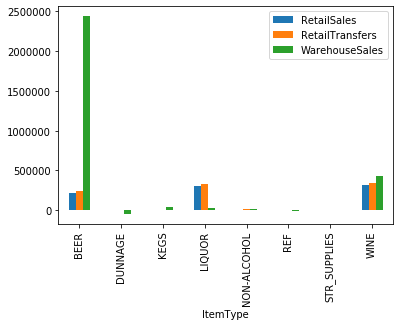

In [4]:
bch = bch.replace(np.nan,0)
bch.plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [5]:
top = data[['RetailSales','WarehouseSales']].groupby(data['Supplier']).sum()
top = top.replace(np.nan,0)
top['MixSales']= top['RetailSales']+top['WarehouseSales']
t10 = top.sort_values(by='MixSales',ascending=False)
t10 = t10[:10]
t10


,RetailSales,WarehouseSales,MixSales
Supplier,,,
MILLER BREWING COMPANY,35022.63,572623.41,607646.04
CROWN IMPORTS,26707.83,579824.70,606532.53
ANHEUSER BUSCH INC,42559.14,493856.19,536415.33
HEINEKEN USA,20923.17,318812.59,339735.76
E & J GALLO WINERY,67455.63,75594.99,143050.62
DIAGEO NORTH AMERICA INC,57656.36,54252.88,111909.24
CONSTELLATION BRANDS,54472.51,44968.76,99441.27
BOSTON BEER CORPORATION,10773.25,53420.91,64194.16
YUENGLING BREWERY,9628.35,53805.32,63433.67


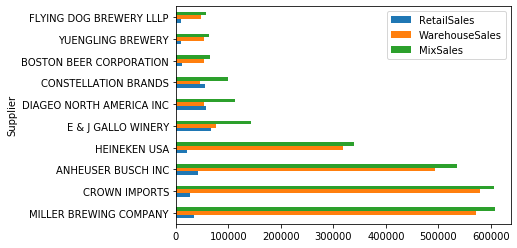

In [6]:
t10.plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [7]:
timed = data.groupby(['Year','Month'])[['RetailSales','RetailTransfers',"WarehouseSales"]].mean()
timed.head()

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909

[Text(0, 0, '(2017, 4)'),
 Text(0, 0, '(2017, 5)'),
 Text(0, 0, '(2017, 6)'),
 Text(0, 0, '(2017, 8)'),
 Text(0, 0, '(2017, 9)'),
 Text(0, 0, '(2017, 10)'),
 Text(0, 0, '(2017, 11)'),
 Text(0, 0, '(2017, 12)'),
 Text(0, 0, '(2018, 1)'),
 Text(0, 0, '(2018, 2)')]

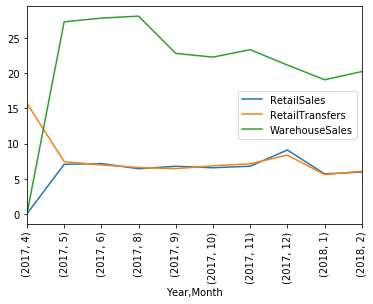

In [8]:
ax = timed.plot()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## 4. Plot the same information as above but as a bar chart.

[Text(0, 0, '(2017, 4)'),
 Text(0, 0, '(2017, 5)'),
 Text(0, 0, '(2017, 6)'),
 Text(0, 0, '(2017, 8)'),
 Text(0, 0, '(2017, 9)'),
 Text(0, 0, '(2017, 10)'),
 Text(0, 0, '(2017, 11)'),
 Text(0, 0, '(2017, 12)'),
 Text(0, 0, '(2018, 1)'),
 Text(0, 0, '(2018, 2)')]

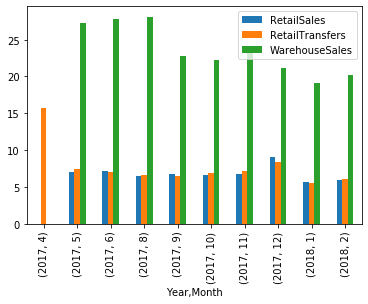

In [9]:
ax = timed.plot.bar()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [10]:
timed = data.groupby(['Year','Month','ItemType'])['RetailSales'].sum()
timed

Year  Month  ItemType    
2017  4      BEER                0.00
             LIQUOR              0.00
             NON-ALCOHOL         0.00
             REF                 0.00
             STR_SUPPLIES        0.00
             WINE                0.00
      5      BEER            25023.24
             LIQUOR          35123.36
             WINE            34546.89
      6      BEER            27863.26
             DUNNAGE             0.00
             KEGS                0.00
             LIQUOR          35035.31
             NON-ALCOHOL      1209.23
             REF                30.60
             STR_SUPPLIES       89.22
             WINE            33129.64
      8      BEER            23030.13
             DUNNAGE             0.00
             KEGS                0.00
             LIQUOR          32186.04
             NON-ALCOHOL      1091.28
             REF                19.54
             STR_SUPPLIES       77.34
             WINE            30707.45
      9      BEER       

[Text(0, 0, '(2017, 4)'),
 Text(0, 0, '(2017, 5)'),
 Text(0, 0, '(2017, 6)'),
 Text(0, 0, '(2017, 8)'),
 Text(0, 0, '(2017, 9)'),
 Text(0, 0, '(2017, 10)'),
 Text(0, 0, '(2017, 11)'),
 Text(0, 0, '(2017, 12)'),
 Text(0, 0, '(2018, 1)'),
 Text(0, 0, '(2018, 2)')]

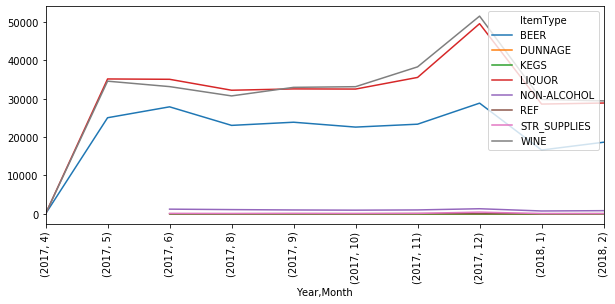

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
timed.unstack().plot(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## 6. Plot the same information as above but as a bar chart.

[Text(0, 0, '(2017, 4)'),
 Text(0, 0, '(2017, 5)'),
 Text(0, 0, '(2017, 6)'),
 Text(0, 0, '(2017, 8)'),
 Text(0, 0, '(2017, 9)'),
 Text(0, 0, '(2017, 10)'),
 Text(0, 0, '(2017, 11)'),
 Text(0, 0, '(2017, 12)'),
 Text(0, 0, '(2018, 1)'),
 Text(0, 0, '(2018, 2)')]

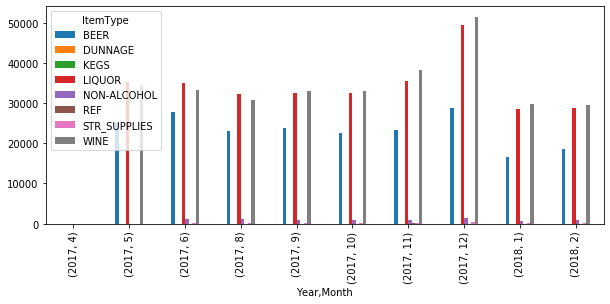

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
ax = timed.unstack().plot.bar(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

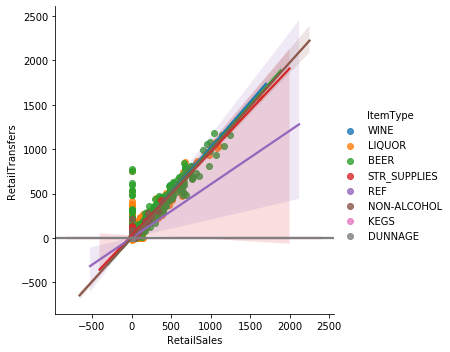

In [13]:
sns.lmplot(x='RetailSales', y='RetailTransfers',hue='ItemType',data=data)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [14]:
num = data.select_dtypes(exclude=['object'])
num.dtypes
numeric = data[['RetailSales','RetailTransfers','WarehouseSales','ItemType']]
numeric = numeric.dropna()
numeric.head()
numeric['ItemType'].value_counts()

Year                 int64
Month                int64
RetailSales        float64
RetailTransfers    float64
WarehouseSales     float64
dtype: object

,RetailSales,RetailTransfers,WarehouseSales,ItemType
0,0.0,1.0,0.0,WINE
1,0.0,1.0,0.0,WINE
2,0.0,8.0,0.0,LIQUOR
3,0.0,2.0,0.0,LIQUOR
4,0.0,4.0,0.0,WINE


WINE            79077
LIQUOR          28397
BEER            16425
KEGS             3638
NON-ALCOHOL       628
STR_SUPPLIES      106
REF                51
DUNNAGE            32
Name: ItemType, dtype: int64

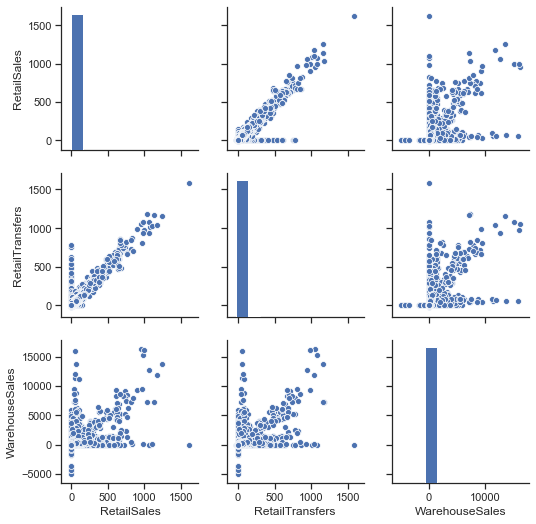

In [15]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(numeric)
# NOTA: la intrucció següent hauria de mostrar els plots per ItemType, però hi ha un error per a Mac
# sns.pairplot(numeric,hue='ItemType')
# https://github.com/mwaskom/seaborn/issues/1502


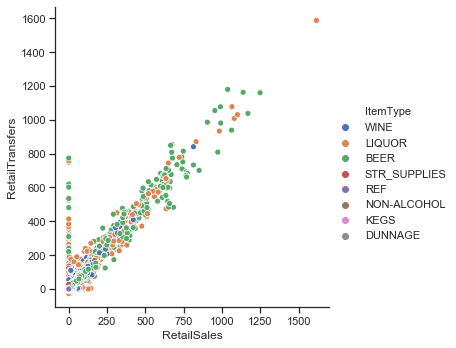

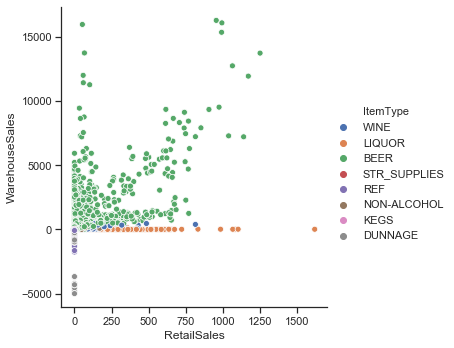

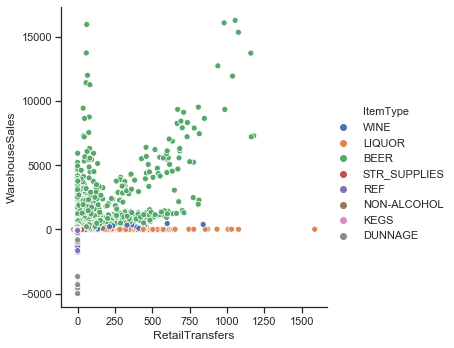

In [16]:
# aproximació element per element
sns.relplot(x='RetailSales', y='RetailTransfers',hue='ItemType',data=numeric)
sns.relplot(x='RetailSales', y='WarehouseSales',hue='ItemType',data=numeric)
sns.relplot(x='RetailTransfers', y='WarehouseSales',hue='ItemType',data=numeric)